# Healthcare
## Course-end Project 2
### Description

* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

* Build a model to accurately predict whether the patients in the dataset have diabetes or not.
 

### Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

##### Variables	Description

* Pregnancies	Number of times pregnant

* Glucose	Plasma glucose concentration in an oral glucose tolerance test

* BloodPressure	Diastolic blood pressure (mm Hg)

* SkinThickness	Triceps skinfold thickness (mm)

* Insulin	Two hour serum insulin

* BMI	Body Mass Index

* DiabetesPedigreeFunction	Diabetes pedigree function

* Age	Age in years

* Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0


## Project Task: Week 1

### Data Exploration:

* Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

        Glucose

        BloodPressure

        SkinThickness

        Insulin

        BMI

* Visually explore these variables using histograms. Treat the missing values accordingly.

* There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

 

### Data Exploration:

* Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

* Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

* Perform correlation analysis. Visually explore it using a heat map.

 

## Project Task: Week 2

### Data Modeling:

* Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

* Apply an appropriate classification algorithm to build a model.

* Compare various models with the results from KNN algorithm.

* Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

<i>Please be descriptive to explain what values of these parameter you have used.</i>

 

### Data Reporting:


* Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

* Pie chart to describe the diabetic or non-diabetic population

* Scatter charts between relevant variables to analyze the relationships

* Histogram or frequency charts to analyze the distribution of the data

* Heatmap of correlation analysis among the relevant variables

* Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.


## Importing Libraries

In [109]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import warnings

In [110]:
# Importing Sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score,
                             recall_score,
                             confusion_matrix,
                             classification_report, 
                             accuracy_score, 
                             f1_score, 
                             roc_curve,
                             roc_auc_score,
                             auc)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [111]:
warnings.filterwarnings('ignore')   # Suppressing the warnings

## Importing The Dataset"

In [112]:
df = pd.read_csv('health care diabetes.csv')    # Reading the csv file
df.head()   # Printing the head of the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
df.tail()   # Printing the tail of the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [114]:
df.shape    # Checking the numbers of rows and columns

(768, 9)

In [115]:
df.info()   # Checking detailed info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* No nul values detected from the deta8ils and all the columns are numerical type

In [116]:
df.describe()   # Checking the statical values of the numerical columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [117]:
df.duplicated().sum() # Checking for the duplicates

0

* No duplicates detected

In [118]:
df.columns = df.columns.str.lower()     # Changing the column name to smaller case

* Plotting the histogram plot for each of the columns

In [119]:
# Defining the subplot's dimension
fig = make_subplots(rows = 3,
                    cols = 3,
                    subplot_titles=[f'<i>{i.title()}' for i in df.columns])

l = len(df.columns)

# Adding the traces to the subplot frame
for i in range(l):
    fig.add_trace(go.Histogram(x = df[df.columns[i]]),
                  col = i % 3 + 1,
                  row = i // 3 +1)

# Modifying features of the subplot
fig.update_layout(height = 900,
                width = 900,
                title_text = '<b>Feature Distribution',
                template = 'plotly_dark',
                title_x = 0.5,
                showlegend=False)

fig.show()

* Seeing the unneccessary zeroes in BMI, Glucose, BloodPressure, Skin Thickness, Insulin
* Insulin and Skin thickness has highest zeroes
* There are about double negative outcome for Diabetes than the positive result

## Question 1
* There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [120]:
# Making a Dataframe to contain the dtypes of the columns
types = []
for col in df.columns:
    types.append([col, str(df[col].dtype)])
types = pd.DataFrame(types, columns = ['col_name', 'col_type'])

In [121]:
# Plotting the barplot for it
fig = px.bar(types['col_type'],
                   template = 'plotly_dark',
                   width = 500)
fig.show()

## Question 2
* Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

        Glucose

        BloodPressure

        SkinThickness

        Insulin

        BMI

In [122]:
feature_list = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']  # List containing the features for modification

In [123]:
# Defining the subplot's dimension
fig = make_subplots(rows = 3,
                    cols = 2,
                    subplot_titles=[f'<i>{i.title()}' for i in feature_list])

l = len(feature_list)

# Adding trace to the subplots
for i in range(l):
    fig.add_trace(go.Histogram(x = df[feature_list[i]]),
                  col = i % 2 + 1,
                  row = i % 3 + 1)

# Modifying the Plot Parameters
fig.update_layout(height = 900,
                width = 900,
                title_text = '<b>Feature Distribution',
                template = 'plotly_dark',
                title_x = 0.5,
                showlegend=False)


fig.show()

In [124]:
print(">>>Total number of missing values\n...", end = ' ')
print(df.isnull().sum().sum())
print('>>>Total number of Zeroes in the faeature cols\n')
for col in feature_list:
    print(f'{col.title()} : {(df[col] == 0).sum()}')

>>>Total number of missing values
... 0
>>>Total number of Zeroes in the faeature cols

Glucose : 5
Bloodpressure : 35
Skinthickness : 227
Insulin : 374
Bmi : 11


* As we can see that the column Skill Thickness and insulin have higher amounts of zeroes, whereas the columns bmi, glucose and bloodpressure have lower amount of zeroes
* We will use KNN-imputer to replace the values with their nearest possible values

* Replacing Zeroes in the specified columns with nan for the implementation of KNN imputer

In [125]:
for col in feature_list:
    df[col] = df[col].replace(0, np.nan)
print(">>>Total number of missing values\n...", end = ' ')
print(df.isnull().sum())

>>>Total number of missing values
... pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64


* Implementing KNN Imputer

In [126]:
imputer = KNNImputer(n_neighbors=14)
df_temp = imputer.fit_transform(df)
df=pd.DataFrame(df_temp,columns=df.columns)
df.shape


(768, 9)

* Checking the values for confirmation


In [127]:
print(">>>Total number of missing values\n...", end = ' ')
print(df.isnull().sum().sum())
print('>>>Total number of Zeroes in the faeature cols\n')
feature_list = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']
for col in feature_list:
    print(f'{col.title()} : {(df[col] == 0).sum()}')

>>>Total number of missing values
... 0
>>>Total number of Zeroes in the faeature cols

Glucose : 0
Bloodpressure : 0
Skinthickness : 0
Insulin : 0
Bmi : 0


## Question 3
* Visually explore these variables using histograms. Treat the missing values accordingly.

In [128]:
fig = make_subplots(rows = 3,
                    cols = 2,
                    subplot_titles=[f'<i>{i.title()}' for i in feature_list])
l = len(feature_list)
for i in range(l):
    fig.add_trace(go.Histogram(x = df[feature_list[i]]),
                  col = i % 2 + 1,
                  row = i % 3 +1)

fig.update_layout(height = 900,
                width = 900,
                title_text = '<b>Feature Distribution',
                template = 'plotly_dark',
                title_x = 0.5,
                showlegend=False)


fig.show()

In [129]:
def outliers(feature_list, dataset) :
    
    l = len(feature_list)
    row = 3
    col = l//row
    fig = make_subplots(rows = row,
                        cols = col,
                        subplot_titles=[f'<i>{i.title()}' for i in feature_list])
    for i in range(l):
        fig.add_trace(go.Box(x = dataset[feature_list[i]]),
                    col = i % col + 1,
                    row = i // row +1)

    fig.update_layout(height = 900,
                    width = 900,
                    title_text = '<b>Feature Distribution')

    fig.update_layout(template = 'plotly_dark',
                    title_x = 0.5)
    fig.update_layout(showlegend=False)

    fig.show()
    
outliers(df.columns, df )

# Data Exploration:
## Question 4
* Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [130]:
fig = px.pie(values = df['outcome'].value_counts(),
                      
                      height = 500, 
                      width = 500,                     
                      template = 'plotly_dark',
                      title = 'Outcome Ratio'
                      )
fig.update_traces(textposition='inside', textinfo='percent+label', showlegend = False)

fig.show()

In [131]:
df['outcome'].value_counts()

outcome
0.0    500
1.0    268
Name: count, dtype: int64

* From the above chart, we can see that 65% of people are healthy

In [132]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['outcome']==0)] 
df_minority = df[(df['outcome']==1)] 

* OverSampled Dataset

In [133]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 500, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled['outcome'].value_counts()

outcome
1.0    500
0.0    500
Name: count, dtype: int64

* Under Sampled

In [134]:
df_majority_undersampled = resample(df_majority, 
                                 n_samples= 268, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])
df_undersampled['outcome'].value_counts()

outcome
0.0    268
1.0    268
Name: count, dtype: int64

# Question 5
* Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [135]:
x= ['glucose', 'age', 'insulin', 'bmi', 'diabetespedigreefunction']
y= ['outcome', 'pregnancies', 'glucose', 'skinthickness', 'pregnancies']

In [136]:

# Initialising the plot variable as str
fig1 = ''
fig2 = ''
fig3 = ''
fig4 = ''
fig5 = ''


# Storing the variables in list figures
figures = [fig1, fig2, fig3, fig4, fig5]

# Creting plots using for loop
for i in range(5):
    figures[i] = px.scatter(df,
            x = x[i],
            y = y[i],
            color = x[i],
            color_continuous_scale = 'tealrose',
            trendline='ols')

# Storing the headers for the Names of Plots in a list
figure_names = []
for i in range(5):
    figure_names.append(f'<i>{x[i].title()} VS {y[i].title()}')

# Initialising the trace list and then storing them into another list for looping
figure1_traces = []
figure2_traces = []
figure3_traces = []
figure4_traces = []
figure5_traces = []


figure_traces = [figure1_traces , figure2_traces, figure3_traces, figure4_traces, figure5_traces]

# Taking the elements from the plots and using them to create traces for the subplots
for i in range(5):
    for trace in range(len(figures[i]["data"])):
        figures[i]["data"][trace]['showlegend'] = False             
        figure_traces[i].append(figures[i]["data"][trace])

# Creting the subplot Figure
comparison_figure = make_subplots(rows = 5, cols = 1, subplot_titles = figure_names)

# Adding the traces to the figure
for i in range(5):
    for traces in figure_traces[i]:
        comparison_figure.append_trace(traces, row = i+1, col = 1)

comparison_figure.update_layout(height = 2500, width = 1000, title_text = "Comaprison Graphs", title_font_size = 25, template = 'plotly_dark')
    
comparison_figure.show()

# Question 6
* Perform correlation analysis. Visually explore it using a heat map.

In [137]:
fig = px.imshow(df.corr(),
            text_auto =True,
            height =900,
            width = 999,
            template = 'plotly_dark', 
            title = '<b>Heat Map for Different Attributes')
fig.show()

## Project Task: Week 2

### Data Modeling:

## Question 7
* Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

* Splitting the dataset into two sub-sets X and y, where X contains the features and y contains the outcome columns

In [138]:
# Making fuction to print the different scores of the 
def Model_Performance(test,pred):
    precision = precision_score(test,pred)  # Calclulating Precision
    recall = recall_score(test,pred)    # Calculating Recall
    f1 = f1_score(test,pred)
    print(">>> Accuracy Score:", round(accuracy_score(test, pred)*100,2),"%")
    print(">>> Precision:", round(precision*100,2),"%")
    print(">>> Recall:",round(recall*100,2),"%" )
    print(">>> F1 Score:",round(f1*100,2),"%" )
    print(">>> clasification report:\n",classification_report(test, pred))

In [139]:
# making function to run the prov8ided model

def run_model(model, X_train, X_test, y_train, y_test):
    print(f"{'*'*72}\n")
    
    model.fit(X_train,y_train)  # fittung the dataset onto the model

    y_pred = model.predict(X_test)  # Predicting values

    res= confusion_matrix(y_test, y_pred)

    conf_mat = px.imshow(res,
                        text_auto = True,
                        height = 400,
                        width = 400,
                        template = 'plotly_dark',
                        title = 'Confusion Matrix'
                        )
    conf_mat.show()
    
    Model_Performance(y_test, y_pred)   # Cheecking model performance
    
    print(f"{'*'*72}\n"*2)

    
   

* Making Model frames

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
log_model = LogisticRegression(solver='liblinear')
knn_model = KNeighborsClassifier(n_neighbors=17)
decision_tree_model = DecisionTreeClassifier(max_depth=4)
rand_forest_model = RandomForestClassifier()
xgboost_model = XGBClassifier()

* Splitting the dataset into X_train, X_test, y_train, y_test

In [142]:
X = df.drop(['outcome'],axis=1)
y = df.outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.30,
                                                        random_state = 999)

* Running the models

In [143]:
print(">>> Logistic Model <<<")
run_model(log_model, X_train, X_test, y_train, y_test)
print(">>> KNeighbors Classifier Model <<<")
run_model(knn_model, X_train, X_test, y_train, y_test)
print(">>> Decision Tree Model <<<")
run_model(decision_tree_model, X_train, X_test, y_train, y_test)
print(">>> Random Forest Model <<<")
run_model(rand_forest_model, X_train, X_test, y_train, y_test)
print(">>> XG-BoostModel <<<")
run_model(xgboost_model,  X_train, X_test, y_train, y_test)

>>> Logistic Model <<<
************************************************************************



>>> Accuracy Score: 78.35 %
>>> Precision: 70.49 %
>>> Recall: 57.33 %
>>> F1 Score: 63.24 %
>>> clasification report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       156
         1.0       0.70      0.57      0.63        75

    accuracy                           0.78       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.78      0.78      0.78       231

************************************************************************
************************************************************************

>>> KNeighbors Classifier Model <<<
************************************************************************



>>> Accuracy Score: 71.0 %
>>> Precision: 54.76 %
>>> Recall: 61.33 %
>>> F1 Score: 57.86 %
>>> clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       156
         1.0       0.55      0.61      0.58        75

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.72      0.71      0.71       231

************************************************************************
************************************************************************

>>> Decision Tree Model <<<
************************************************************************



>>> Accuracy Score: 70.56 %
>>> Precision: 53.85 %
>>> Recall: 65.33 %
>>> F1 Score: 59.04 %
>>> clasification report:
               precision    recall  f1-score   support

         0.0       0.81      0.73      0.77       156
         1.0       0.54      0.65      0.59        75

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231

************************************************************************
************************************************************************

>>> Random Forest Model <<<
************************************************************************



>>> Accuracy Score: 77.06 %
>>> Precision: 66.18 %
>>> Recall: 60.0 %
>>> F1 Score: 62.94 %
>>> clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       156
         1.0       0.66      0.60      0.63        75

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.77      0.77      0.77       231

************************************************************************
************************************************************************

>>> XG-BoostModel <<<
************************************************************************



>>> Accuracy Score: 74.03 %
>>> Precision: 58.43 %
>>> Recall: 69.33 %
>>> F1 Score: 63.41 %
>>> clasification report:
               precision    recall  f1-score   support

         0.0       0.84      0.76      0.80       156
         1.0       0.58      0.69      0.63        75

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.76      0.74      0.75       231

************************************************************************
************************************************************************



* As we can see the Logistic model has best performance, so we keep the results from it

In [144]:
print(f"{'*'*72}\n")

log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)

res= confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
conf_mat = px.imshow(res,
                     text_auto = True,
                     height = 400,
                     width = 400,
                     template = 'plotly_dark',
                     title = 'Confusion Matrix'
                     )
conf_mat.show()

Model_Performance(y_test, y_pred) 

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc=auc(fpr,tpr)

# Plotting the 
fig = px.line(x=fpr,
              y=tpr,
              title=f'ROC Curve (AUC={auc(fpr, tpr)*100:.2f}%)',
              labels=dict(x='False Positive Rate', y='True Positive Rate'),
              width=700,
              height=500,
              template = 'plotly_dark'
)

fig.add_shape(type='line', 
              line=dict(dash='dash'),
              x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x",
                 scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Making the Dataframe for Importance Check
model_f = pd.DataFrame()
model_f['Features'] = list(X_train.columns)
model_f['importance'] = list(log_model.coef_[0])

imp_check=pd.DataFrame(model_f.sort_values(by='importance'))

# Plotting Importance wise Barplot
fig= px.bar(data_frame= imp_check,
            y='Features',
            x='importance',
            title='Features by Importance',
            template = 'plotly_dark',
            width = 800,)
fig.show()

************************************************************************



>>> Accuracy Score: 78.35 %
>>> Precision: 70.49 %
>>> Recall: 57.33 %
>>> F1 Score: 63.24 %
>>> clasification report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       156
         1.0       0.70      0.57      0.63        75

    accuracy                           0.78       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.78      0.78      0.78       231



# Tableau Dashboard Link

https://public.tableau.com/views/HealthCAre/Dashboard?:language=en-GB&:sid=&:display_count=n&:origin=viz_share_link

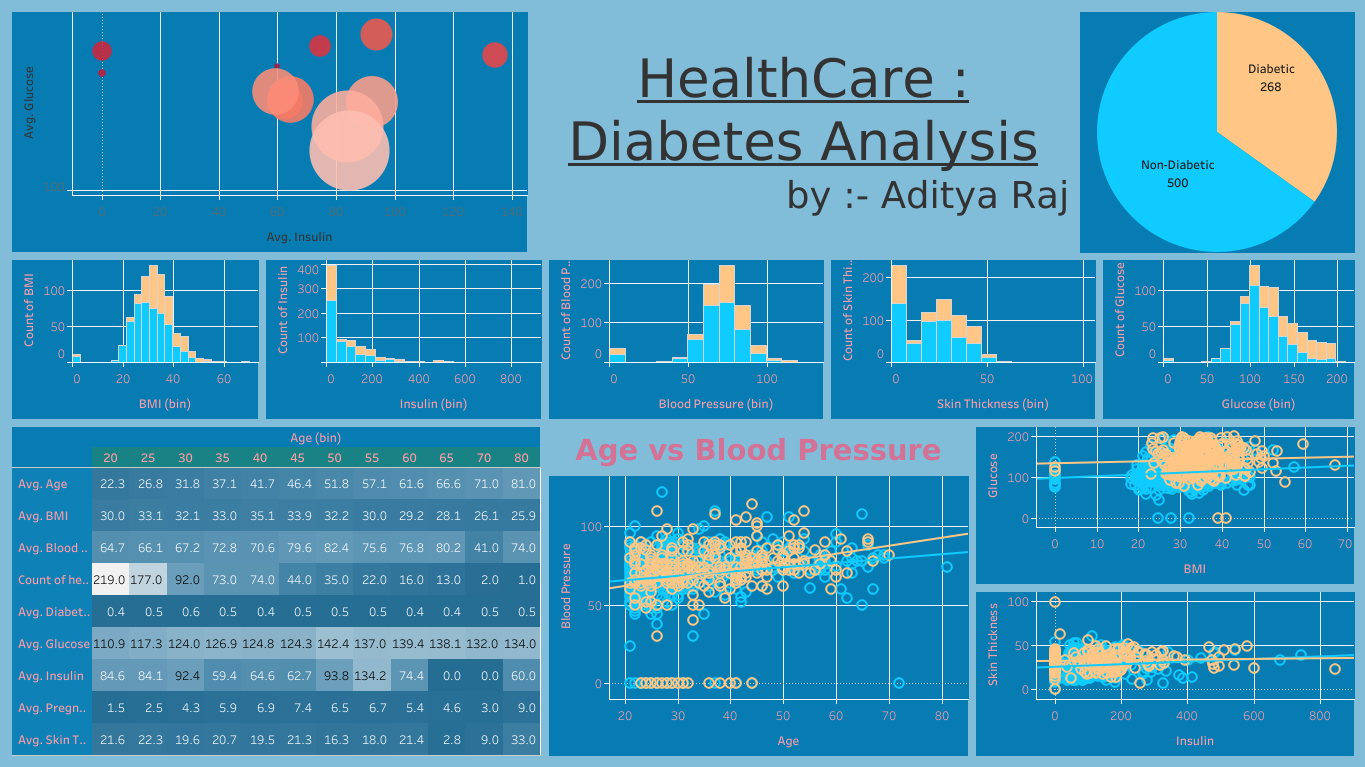

# Thank You for Viewing this Project by - Aditya Raj